In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\Geetu Sodhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


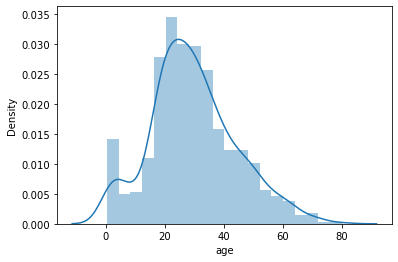

In [26]:
import matplotlib.pyplot as plt
sns.distplot(titanic['age'])
plt.show()

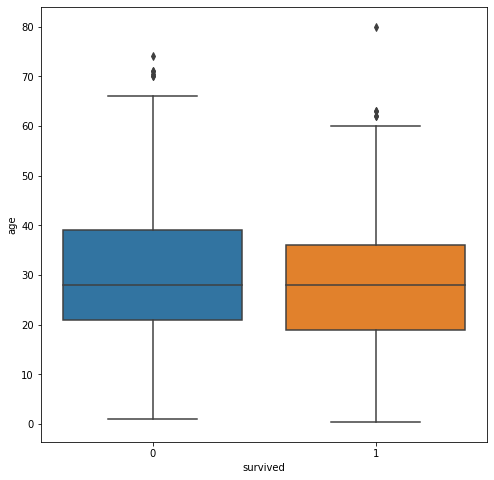

In [27]:
plt.figure(figsize=(8,8))
sns.boxplot(x="survived", y="age", data=titanic)
plt.show()

In [28]:
#GROUP BY: SINGLE GROUP SINGLE COLUMN

titanic.groupby(['pclass'])['survived'].sum()

# titanic.groupby(['pclass'])['survived'].mean()

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

In [29]:
#GROUP BY: SINGLE GROUP multiple COLUMN

titanic.groupby(['pclass'])[['survived','fare']].mean()

,survived,fare
pclass,,
1,0.629630,84.154687
2,0.472826,20.662183
3,0.242363,13.675550


In [8]:
#GROUP BY: multiple GROUP multiple COLUMN
titanic.groupby(['pclass','sex'])[['survived','fare']].sum()

survived       fare
pclass sex                        
1      female        91  9975.8250
       male          45  8201.5875
2      female        70  1669.7292
       male          17  2132.1125
3      female        72  2321.1086
       male          47  4393.5865

In [9]:
#GROUP BY: multiple GROUP multiple COLUMN
titanic.groupby(['pclass','sex'],as_index=False)[['survived','fare']].sum()

,pclass,sex,survived,fare
0,1,female,91,9975.8250
1,1,male,45,8201.5875
2,2,female,70,1669.7292
3,2,male,17,2132.1125
4,3,female,72,2321.1086
5,3,male,47,4393.5865


In [33]:
#GROUP BY: one GROUP multiple functions


titanic.groupby(['pclass'])['survived'].agg(['sum','mean'])

,sum,mean,min,max
pclass,,,,
1,136,0.629630,0,1
2,87,0.472826,0,1
3,119,0.242363,0,1


In [3]:

titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [35]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


# This immediately gives us some insight: overall, three of every four females on board survived, 
# while only one in five males survived!This is useful, but we might like to go one step deeper and look at 
# survival by both sex and, say, class. Using the vocabulary of GroupBy, we might proceed using something like this:
# we group by class and gender, select survival, apply a mean aggregate, combine the resulting groups, 
# and then unstack the hierarchical index to reveal the hidden multidimensionality.

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [5]:
#Pivot Table

titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [45]:
#Multilevel pivot table
# For example, we might be interested in 
# looking at age as a third dimension. We'll bin the age using the pd.cut function:

agegroups = pd.cut(titanic['age'], [0, 18,50, 80])
df_pivot=titanic.pivot_table('survived', ['sex', agegroups],'class',aggfunc='sum')
df_pivot

class            First  Second  Third
sex    age                           
female (0, 18]      10      14     22
       (18, 50]     59      52     24
       (50, 80]     13       2      1
male   (0, 18]       4       9     11
       (18, 50]     31       5     27
       (50, 80]      5       1      0

In [40]:
# We can apply the same strategy when working with the columns as well; 
# let's add info on the fare paid using pd.qcut to automatically compute quantiles:

fare = pd.qcut(titanic['fare'], 4)
titanic.pivot_table('survived', ['sex', agegroups], [fare, 'class'],aggfunc='sum')

fare            (-0.001, 7.91]              (7.91, 14.454]               \
class                    First Second Third          First Second Third   
sex    age                                                                
female (0, 18]               0      0     5              0      3    10   
       (18, 50]              0      0     9              0     22     6   
       (50, 80]              0      0     0              0      0     1   
male   (0, 18]               0      0     0              0      0     6   
       (18, 50]              0      0    11              0      4    11   
       (50, 80]              0      0     0              0      1     0   

fare            (14.454, 31.0]              (31.0, 512.329]               
class                    First Second Third           First Second Third  
sex    age                                                                
female (0, 18]               0      8     6              10      3     1  
       (18, 50]              6     25     8              53      5     1  
       (50, 80]              1      2     0              12      0     0  
male   (0, 18]               0      6     4               4      3     1  
       (18, 50]             13      1     2              18      0     3  
       (50, 80]              3      0     0               2      0     0

#More arguments in pivot_table
import pandas as pd
df=DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')


In [23]:
titanic.pivot_table(['survived','fare'],index='sex', columns='class',
                    aggfunc={ 'fare':'mean', 'survived':'sum'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

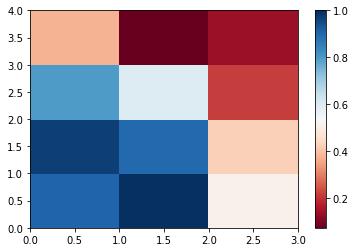

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()


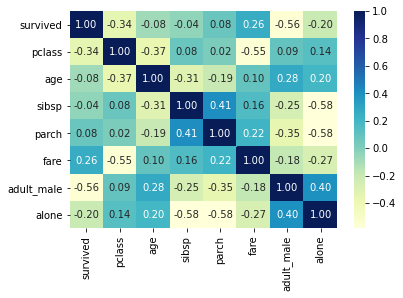

In [41]:
sns.heatmap(titanic.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

#The ‘annot’ parameter is especially useful, as it writes the data value in each square. 
#This way we can see the correlation coefficient.

In [28]:
# Now what are some correlations we might look for?

# Is there a correlation between age and fare price?
# Is there a correlation between class and survival? Did rich people survive more than the working people?
# Was there a correlation between age and survival? Did they really allow "women and children first"?
# # What about the passenger's sex and survival?


# We all know the old trope that when a ship is sinking it is "women and children first" into the lifeboats. 
# Did this old adage stay true on the Titanic? Did more women and children survive than grown men?
# Did people's sex, age, or class matter most on the Titanic for their survival?

# If women and children survived more than men, there would be a positive correlation between
# survival and sex and survival and age.

# We can find the correlation between any two features with the Pandas method feature.corr(feature)

titanic['survived'].corr(titanic['age'])

-0.07722109457217764

In [31]:
titanic['sex'].str.get_dummies().corrwith(titanic['survived']/titanic['survived'].max())

female    0.543351
male     -0.543351
dtype: float64

In [ ]:
# str.get_dummies creates dummy (integer) variables that correspond to the string values, 
# and corrwith is another way to compute correlation when you need to do so between a mixture
# of rows and columns (corr just works with columns only).

# NOTE–Correlation is expressed as a number between -1 and 1, but correlation is not the probability that something occurs.

In [ ]:
# Positive 1—1.000 means that there is a perfect, positive correlation between two features, as one feature goes up, 
#the other goes up exactly in proportion. If there is a negative number

# Zero 1—0.000 means there is no correlation positive or negative between two features. They move completely 
#at random to one another.

# Negative 1—-1.000 means that there is a perfect, negative or inverse correlation between two features. As one feature goes up, the other goes down and vise versa.

# –1. A perfect negative (downward sloping) linear relationship
# –0.70. A strong negative (downward sloping) linear relationship
# –0.50. A moderate negative (downhill sloping) relationship
# –0.30. A weak negative (downhill sloping) linear relationship
# 0. No linear relationship
# +0.30. A weak positive (upward sloping) linear relationship
# +0.50. A moderate positive (upward sloping) linear relationship
# +0.70. A strong positive (upward sloping) linear relationship
# +1. A perfect positive (upward sloping) linear relationship

In [ ]:
https://makeschool.org/mediabook/oa/tutorials/titanic-dataset-tutorial-an-intro-to-data-analysis-and-statistics-n40/probability/

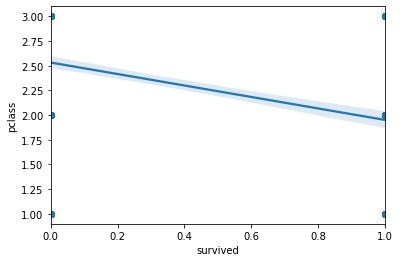

In [58]:
sns.regplot(x="survived", y="pclass", data=titanic)
plt.show()

<AxesSubplot:xlabel='pclass', ylabel='survived'>

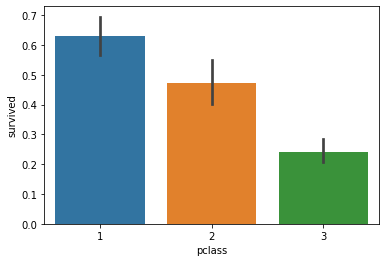

In [52]:
sns.barplot(x='pclass', y='survived', data=titanic)

<AxesSubplot:xlabel='survived', ylabel='pclass'>

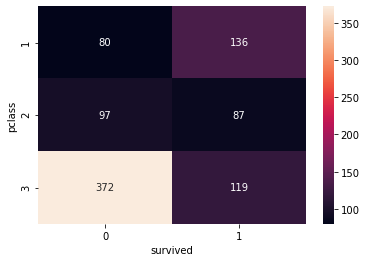

In [51]:
group = titanic.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [54]:
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
https://github.com/viswanathanc/statistics/blob/master/Titanic%20Chi%20Square%20test%20-%20PClass%20vs%20Survied.ipynb

In [24]:
# The Chi Square statistic is commonly used for testing relationships between categorical variables. 
# The null hypothesis of the Chi-Square test is that no relationship exists on the
# categorical variables in the population; they are independent.

# Null Hypothesis: Passenger CLASS had no effect on the likelihood of survival
# Data to be extracted: proporions of each passenger CLASS who were SAVED and who were LOST i 
# guess is the numbers of people saved


from scipy.stats import chi2_contingency
from scipy.stats import chi2

no_classes = titanic['pclass'].dropna().nunique()
print("Number of classes", no_classes)
series = titanic.value_counts(titanic['pclass'])
print("Series", series)
series1 = pd.Series({'nunique': no_classes, 'unique values': series.index.tolist()})
series.append(series1)
print(series)

Number of classes 3
Series pclass
3    491
1    216
2    184
dtype: int64
pclass
3    491
1    216
2    184
dtype: int64
